In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df=pd.read_csv("BostonHousing.csv")

In [5]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [8]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [9]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

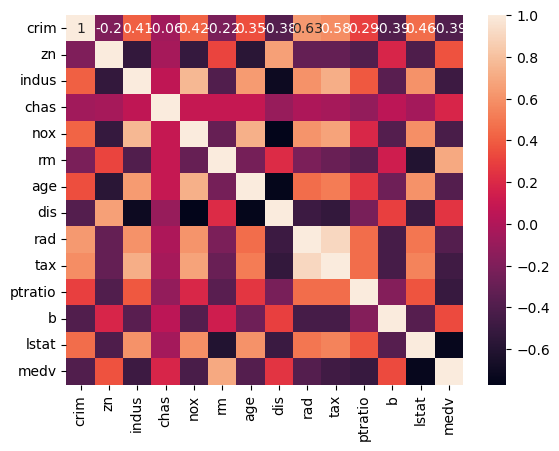

In [10]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_17088\2233295577.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['medv'], bins=30)
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


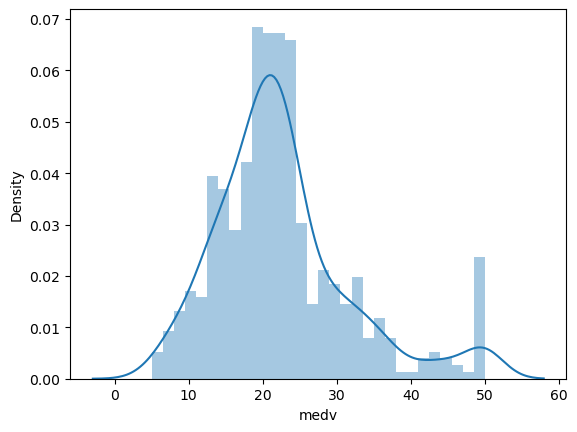

In [12]:
sns.distplot(df['medv'], bins=30)
plt.show()

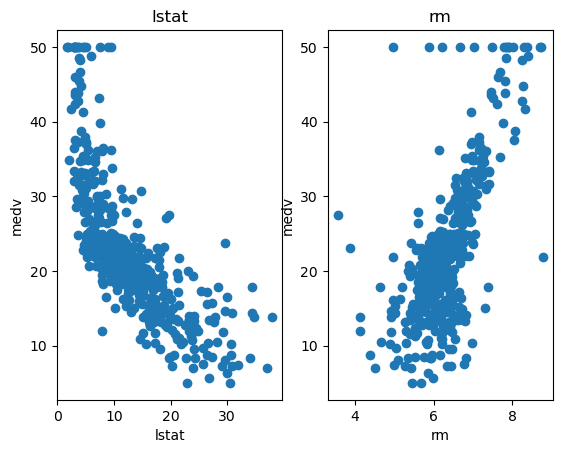

In [13]:
features= ['lstat', 'rm']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = df['medv']
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('medv')

In [14]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'medv']
y = df.loc[:, df.columns == 'medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [15]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In [17]:
!pip install tensorflow

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(512, input_shape=(13, ), activation='relu', name='dense_1'))
model.add(Dense(256, activation='relu', name='dense__layer_1'))
model.add(Dense(128, activation='relu', name='dense__layer_2'))
model.add(Dense(64, activation='relu', name='dense_layer_3'))
model.add(Dense(1, activation='relu', name='dense_output'))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 512)                 │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense__layer_1 (Dense)               │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense__layer_2 (Dense)               │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_3 (Dense)                │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_output (Dense)                 │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 179,713 (702.00 KB)

 Trainable params: 179,713 (702.00 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05, verbose = 1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 431.6188 - mae: 17.9669 - val_loss: 101.1566 - val_mae: 7.3214
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79.1200 - mae: 6.5924 - val_loss: 75.2700 - val_mae: 7.7545
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 59.5724 - mae: 5.7323 - val_loss: 56.8106 - val_mae: 6.3026
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 48.2742 - mae: 4.9904 - val_loss: 55.8655 - val_mae: 4.6989
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 44.1172 - mae: 4.7549 - val_loss: 45.3718 - val_mae: 6.1355
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 34.5406 - mae: 4.5811 - val_loss: 50.1318 - val_mae: 4.2914
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.8585 - mae: 3.2748 - val_loss: 38.1661 - val_mae: 5.4129
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30.8993 - mae: 4.0630 - val_loss: 31.9348 - val_mae: 4.7360
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7m

In [21]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25.4594 - mae: 3.0389 
Mean squared error on test data:  17.815053939819336
Mean absolute error on test data:  2.7659666538238525


In [24]:
ypred=model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [25]:
ypred

array([[27.198332],
       [29.356735],
       [47.589756],
       [20.179579],
       [29.24824 ],
       [49.04416 ],
       [28.687738],
       [11.24654 ],
       [19.702105],
       [33.066235],
       [24.572693],
       [21.547174],
       [14.867529],
       [30.73284 ],
       [19.610777],
       [21.363247],
       [21.35194 ],
       [39.935524],
       [19.49735 ],
       [17.437807],
       [13.88613 ],
       [30.178799],
       [38.14679 ],
       [44.433643],
       [44.04312 ],
       [24.640806],
       [15.402981],
       [22.253603],
       [22.09504 ],
       [16.7288  ],
       [26.120407],
       [35.588554],
       [13.125741],
       [21.492416],
       [23.524523],
       [34.748505],
       [26.71852 ],
       [15.359151],
       [15.95881 ],
       [45.58678 ],
       [31.623693],
       [20.555067],
       [29.60527 ],
       [51.306057],
       [19.179728],
       [26.204817],
       [20.578463],
       [23.007856],
       [17.749872],
       [26.09221 ],
